1. KDDCup
2. tramento [ 8 tipos ]
  * Limpeza de Dados
  * Normalização
  * Transformação de Variáveis Categóricas
  * Redução de Dimensionalidade
#2. Tratamento de Dados
  * Limpeza de Dados: Remoção de entradas duplicadas ou irrelevantes.
  * Normalização: Escalonamento dos dados para que todas as variáveis tenham a mesma importância. Isso pode ser feito usando técnicas como Min-Max Scaling ou Z-score normalization.
  * Transformação de Variáveis Categóricas: Conversão de variáveis categóricas em numéricas, utilizando técnicas como one-hot encoding.
  * Redução de Dimensionalidade: Aplicação de técnicas como PCA (Análise de Componentes Principais) para reduzir o número de características, mantendo a maior quantidade de informação possível.

In [68]:
# importar bibliotecas necessárias
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
# pip install pandas numpy sklearn
import gc

#%pip install --upgrade scikit-learn xgboost

In [69]:
# Carregar o arquivo (sem cabeçalhos)
# Carregar o arquivo (sem cabeçalhos)
colunas = pd.read_csv("NUSW-NB15_features.csv", encoding='latin-1') # or 'ISO-8859-1' or 'cp1252'
colunas["Name"] = colunas["Name"].str.replace(' ', '_')
colunas = colunas["Name"].tolist()

In [70]:
csv_files = ['UNSW-NB15_1.csv', 'UNSW-NB15_2.csv', 'UNSW-NB15_3.csv', 'UNSW-NB15_4.csv']

# Create an empty dataframe to store the combined data
dados = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files[3:]:
    df = pd.read_csv(csv_file, header=None, names=colunas)
    dados = pd.concat([dados, df])

In [71]:
# prompt: na tabela substitua as ocorecians de nan na coluna attack_cat por normal

dados['attack_cat'] = dados['attack_cat'].fillna('Normal')
dados['ct_flw_http_mthd'] = dados['ct_flw_http_mthd'].fillna(0)
dados['is_ftp_login'] = dados['is_ftp_login'].fillna(0)
dados['ct_ftp_cmd'] = dados['ct_ftp_cmd'].replace(' ', 0)

dados['service'] = dados['service'].replace('-', 'none')

In [72]:
dados.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,0,2,2,7,4,1,1,3,Normal,0
1,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,0,3,1,4,4,1,1,1,Normal,0
2,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,0,3,5,2,7,1,1,4,Normal,0
3,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,0,1,1,4,7,1,1,3,Normal,0
4,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,0,2,5,2,1,1,1,2,Normal,0


In [73]:
dados.shape

(440044, 49)

In [74]:
# prompt: use o labelEncode na coluna attack, salvando em uma nova coluna

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the 'attack' column and transform it
dados['attack_cat'] = label_encoder.fit_transform(dados['attack_cat'])
label = dados['attack_cat']

In [75]:
label.value_counts()

,count
attack_cat,
8,351150
7,61878
6,11439
0,5390
5,4907
1,3530
3,670
4,666
2,371


In [76]:
dados.drop(columns=["srcip", "dstip", "Label", "attack_cat"], inplace=True)

In [77]:
dados.shape

(440044, 45)

In [78]:
#1. Limpeza de Dados (Remoção de Entradas Duplicadas ou Irrelevantes)
# Remover entradas duplicadas
dados = dados.drop_duplicates()
# Remover linhas com valores nulos
dados = dados.dropna()
dados.reset_index(drop=True, inplace=True)

In [79]:
dados.shape

(303377, 45)

In [80]:
dados.head()

,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,7045,25,tcp,FIN,0.201886,37552,3380,31,29,18,...,0.0,0.0,0,2,2,7,4,1,1,3
1,9685,80,tcp,FIN,5.864748,19410,1087890,31,29,2,...,1.0,0.0,0,3,1,4,4,1,1,1
2,1421,53,udp,CON,0.001391,146,178,31,29,0,...,0.0,0.0,0,3,5,2,7,1,1,4
3,21553,25,tcp,FIN,0.053948,37812,3380,31,29,19,...,0.0,0.0,0,1,1,4,7,1,1,3
4,45212,53,udp,CON,0.000953,146,178,31,29,0,...,0.0,0.0,0,2,5,2,1,1,1,2


In [81]:
# Separar os dados numéricos e categóricos
dados_numericos = dados.select_dtypes(include=["int64", "float64"])
dados_categoricos = dados.select_dtypes(include=["object"])

In [82]:
for col in dados_categoricos.columns:
    dados_categoricos[col] = dados_categoricos[col].astype(str)

In [83]:
from sklearn.preprocessing import LabelEncoder

# Aplicar Label Encoding em cada coluna categórica
for col in dados_categoricos.columns:
    label_encoder1 = LabelEncoder()
    dados_categoricos[col] = label_encoder1.fit_transform(dados_categoricos[col])


In [84]:
# 3. Normalizar dados numéricos
scaler = MinMaxScaler()
dados_numericos_normalizados = pd.DataFrame(scaler.fit_transform(dados_numericos), columns=dados_numericos.columns)

In [85]:
dados_categoricos.shape, dados_numericos_normalizados.shape, label.shape

((303377, 5), (303377, 40), (440044,))

In [86]:
#Combinar tudo
dados_normalizados = pd.concat([dados_numericos_normalizados, dados_categoricos, label], axis=1)
dados_normalizados = dados_normalizados.dropna()
dados_normalizados = dados_normalizados.reset_index(drop=True)

In [87]:
# Resetar os índices antes de concatenar
dados_numericos_normalizados.reset_index(drop=True, inplace=True)
dados_categoricos.reset_index(drop=True, inplace=True)
#dados_categoricos["label"].reset_index(drop=True, inplace=True)

In [88]:
dados_normalizados

,sport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,...,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,dsport,proto,state,service,ct_ftp_cmd,attack_cat
0,0.107500,0.003365,0.003394,0.000263,0.121569,0.114173,0.004329,0.001657,2.606138e-04,0.005709,...,0.050847,0.000000,0.000000,0.032258,12608.0,113.0,4.0,9.0,0.0,8
1,0.147784,0.097746,0.001754,0.084736,0.121569,0.114173,0.000481,0.076620,4.715097e-06,0.064696,...,0.050847,0.000000,0.000000,0.000000,47328.0,113.0,4.0,4.0,0.0,8
2,0.021683,0.000023,0.000013,0.000014,0.121569,0.114173,0.000000,0.000000,7.497176e-05,0.022345,...,0.101695,0.000000,0.000000,0.048387,35832.0,119.0,1.0,1.0,0.0,8
3,0.328878,0.000899,0.003418,0.000263,0.121569,0.114173,0.004570,0.001657,9.827453e-04,0.021363,...,0.101695,0.000000,0.000000,0.032258,12608.0,113.0,4.0,9.0,0.0,8
4,0.689891,0.000016,0.000013,0.000014,0.121569,0.114173,0.000000,0.000000,1.094289e-04,0.032615,...,0.000000,0.000000,0.000000,0.016129,35832.0,119.0,1.0,1.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303372,0.589090,0.009417,0.001275,0.060163,0.121569,0.114173,0.000481,0.054256,3.553237e-05,0.476537,...,0.016949,0.016949,0.016949,0.016129,47328.0,113.0,1.0,4.0,0.0,8
303373,0.589090,0.009417,0.001275,0.060163,0.121569,0.114173,0.000481,0.054256,3.553237e-05,0.476537,...,0.016949,0.016949,0.016949,0.016129,47328.0,113.0,1.0,6.0,0.0,8
303374,0.504982,0.001455,0.000029,0.000142,0.121569,0.114173,0.000241,0.000414,4.368870e-06,0.006400,...,0.033898,0.000000,0.000000,0.032258,27904.0,113.0,4.0,3.0,0.0,8
303375,0.540673,0.036682,0.000316,0.012934,0.121569,0.114173,0.000481,0.011804,2.231520e-06,0.026122,...,0.050847,0.016949,0.016949,0.016129,47328.0,113.0,1.0,4.0,0.0,8


# Divisão do dataset
* ### 60%, 20% e 20%

In [89]:
X, y = dados_normalizados.drop(columns=["attack_cat"]), dados_normalizados["attack_cat"]

In [ ]:
# prompt: LogisticRegression for classification

from sklearn.linear_model import LogisticRegression

# Dividir os dados em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Inicializar e treinar o modelo de Regressão Logística
logreg_model = LogisticRegression(max_iter=1000) # Aumentar max_iter se necessário
logreg_model.fit(X_train, y_train)

# Fazer previsões nos conjuntos de validação e teste
y_pred_val = logreg_model.predict(X_val)
y_pred_test = logreg_model.predict(X_test)

# Avaliar o modelo usando diferentes métricas
print("Logistic Regression - Validation Set:")
print(classification_report(y_val, y_pred_val))
print("Logistic Regression - Test Set:")
print(classification_report(y_test, y_pred_test))

In [90]:
# Divida o conjunto inicial de dados em treino (60%) e o restante (40%) para validação e teste
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Verifique os tamanhos
print("Tamanho do conjunto de treino:", len(X_treino), " | ",(len(X)/100)*60)
print("Tamanho do conjunto de validação:", len(X_validacao), " | ",(len(X)/100)*20)
#print("Tamanho do conjunto de teste:", len(X_teste), " | ",(len(X)/100)*20)

Tamanho do conjunto de treino: 182026  |  182026.2
Tamanho do conjunto de validação: 121351  |  60675.4


In [91]:
import pandas as pd
classes_originais = label_encoder.classes_
# Suponha que y, y_treino, y_validacao e y_teste são Series pandas
# (já com os valores de classe contados anteriormente)

# Contando as classes em cada conjunto
contagem_y = y.value_counts()
contagem_treino = y_treino.value_counts()
contagem_validacao = y_validacao.value_counts()
#contagem_teste = y_teste.value_counts()

# Criando um DataFrame com as contagens
df_comparacao = pd.DataFrame({
    'Classe': contagem_y.index,  # Pegando as classes
    'Classe_Original': [classes_originais[i] for i in contagem_y.index],
    "Sem tratamento": label.value_counts(),
    'Total': contagem_y.values,
    'Treino': contagem_treino.reindex(contagem_y.index, fill_value=0).values,
    'Validacao': contagem_validacao.reindex(contagem_y.index, fill_value=0).values
})

In [92]:
len(y.unique()), y.shape, len(y_treino.unique()), y_treino.shape, len(y_validacao.unique()), y_validacao.shape

(10, (303377,), 10, (182026,), 10, (121351,))

In [93]:
df_comparacao

,Classe,Classe_Original,Sem tratamento,Total,Treino,Validacao
attack_cat,,,,,,
8,8,Normal,351150,246548,147929,98619
7,7,Generic,61878,35107,21064,14043
6,6,Exploits,11439,9214,5528,3686
0,5,DoS,5390,4481,2689,1792
5,0,Fuzzers,4907,3816,2290,1526
1,1,Reconnaissance,3530,2695,1617,1078
3,4,Backdoor,670,609,365,244
4,3,Analysis,666,598,359,239
2,2,Shellcode,371,274,164,110


# Treinamento do modelo
* ### XGBoost - Classificação
#### Gradient Boosting Decision Trees
Encadeamento de Arveres de decisões em que o resultado da arvere influencia nos pesos da proxima arvere.

## Parâmetros:

### Objetivo para multiclasse
- objective='multi:softmax' ou 'multi:softprob':

 - 'multi:softmax': Retorna a classe diretamente.
 - 'multi:softprob': Retorna probabilidades para cada classe (caso
  queira análises adicionais).

- num_class=23:
  - Corresponde ao número de classes no seu dataset.

### Principais
- learning_rate:
   - Taxa de aprendizado. Pode começar com 0.1. Use menor (0.01) se aumentar o número de estimadores (n_estimators).
- n_estimators:

 - Quantidade de árvores. Um valor inicial é 200. Para mais precisão, aumente para 500, mas isso exigirá mais memória e tempo.

- max_depth:

 - Profundidade das árvores. Comece com 6. Ajuste para 4-8 dependendo do overfitting.
- subsample e colsample_bytree:

 - Controlam a fração de amostras e features usadas em cada árvore, respectivamente. Esses valores ajudam a prevenir overfitting.

### Desempenho
- tree_method='hist':

 - Método de construção das árvores otimizado para grandes datasets no Colab.
- reg_alpha e reg_lambda:

 - Regularização para controlar overfitting. Valores iniciais razoáveis são 0.1 e 1.

In [94]:
best_params = {
    'n_neighbors': 4,  # Exemplo: número de vizinhos
    'weights': 'uniform',  # Exemplo: pesos dos vizinhos
    'algorithm': 'auto',  # Exemplo: algoritmo para calcular vizinhos
    'leaf_size': 30, # Exemplo: tamanho da folha
    'p': 2,  # Exemplo: parâmetro de distância (2 para distância euclidiana)
    'weights':'distance'
}

# Inicialize o modelo KNN com os melhores parâmetros
model = KNeighborsClassifier(**best_params, n_jobs=-1)

In [95]:
model.fit(X_treino, y_treino)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [96]:
y_pred = model.predict(X_treino)
y_pred_proba = model.predict_proba(X_treino)

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [98]:
matriz_confusao = confusion_matrix(y_treino, y_pred)

In [99]:
# Calcular a acurácia do modelo
report = classification_report(y_treino, y_pred, output_dict=True)
accuracy = accuracy_score(y_treino, y_pred)
precisao = precision_score(y_treino, y_pred, average='weighted')
recall = recall_score(y_treino, y_pred, average='weighted')
f1 = f1_score(y_treino, y_pred, average='weighted')

In [100]:
overall_accuracy = report['accuracy']
print(f"\nOverall Accuracy (from classification report): {overall_accuracy * 100:.2f}%")
# ... (rest of your existing code)


Overall Accuracy (from classification report): 100.00%


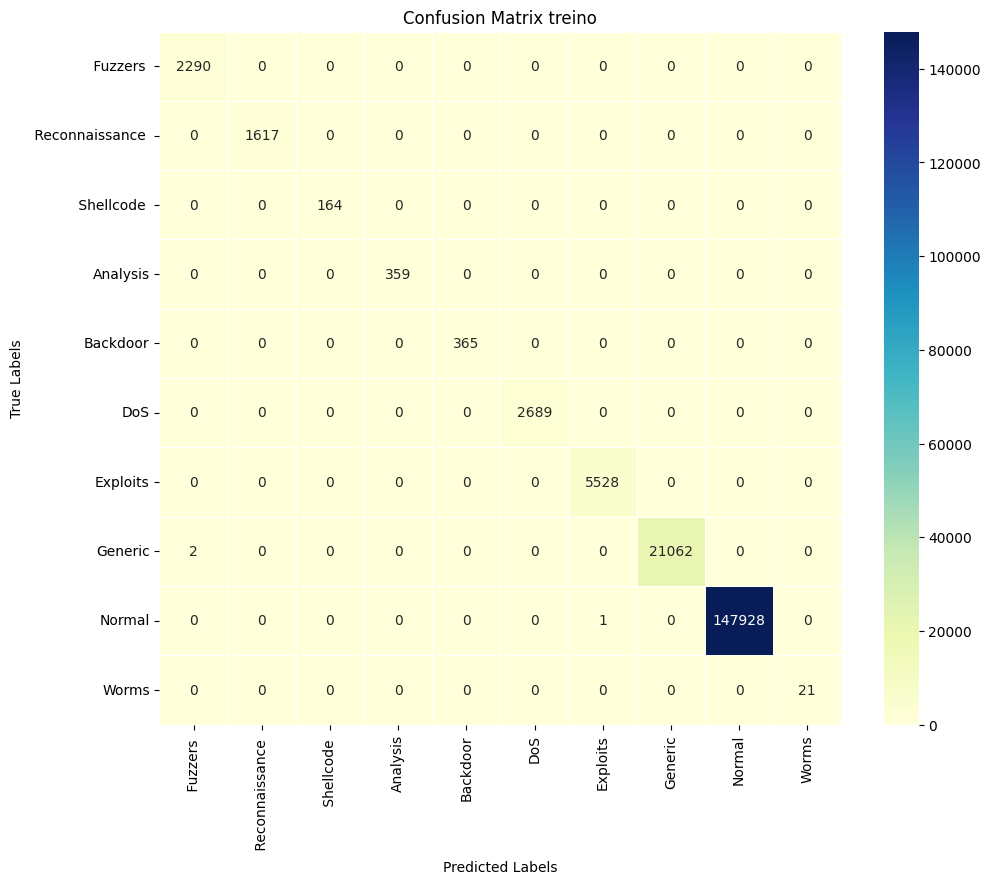

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Calculate the confusion matrix
# Plot the confusion matrix using seaborn
plt.figure(figsize=(11, 9))
sns.heatmap(matriz_confusao,  annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix treino")
plt.show()

<Figure size 1200x600 with 0 Axes>

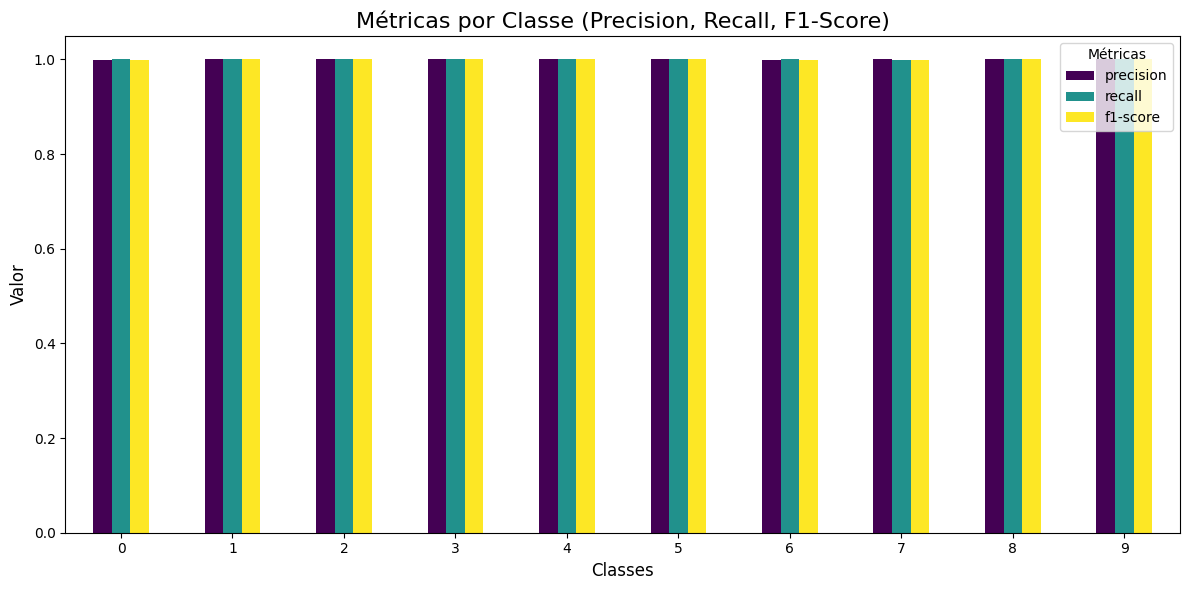

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

# Exemplo: Gerar o classification_report (substitua pelo seu y_validacao e y_pred_v)
# report_v = classification_report(y_validacao, y_pred_v, output_dict=True)

# 1. Transformar o relatório em DataFrame
df_report = pd.DataFrame(report).T

# 2. Separar as métricas das classes e médias gerais
classes = df_report.iloc[:-3, :3]  # Todas as classes (exclui últimas linhas como 'accuracy')
medias = df_report.iloc[-2:, :3]  # 'macro avg' e 'weighted avg'

# 3. Gráfico 1: Métricas por Classe
plt.figure(figsize=(12, 6))
classes.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Métricas por Classe (Precision, Recall, F1-Score)", fontsize=16)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Métricas", loc='upper right')
plt.tight_layout()
plt.show()

In [103]:
y_pred_v = model.predict(X_validacao)
y_pred_proba_v = model.predict_proba(X_validacao)

In [104]:
matriz_confusao_v = confusion_matrix(y_validacao, y_pred_v)

In [105]:
len(y_validacao), len(y_pred_v)

(121351, 121351)

In [106]:
# Calcular a acurácia do modelo
report_v = classification_report(y_validacao, y_pred_v, output_dict=True)
accuracy_v = report_v['accuracy']
precisao_v = report_v['weighted avg']['precision']
recall_v = report_v['weighted avg']['recall']
f1_v = report_v['weighted avg']['f1-score']

In [107]:

overall_accuracy = report_v['accuracy']
print(f"\nOverall Accuracy (from classification report): {overall_accuracy * 100:.2f}%")
# ... (rest of your existing code)


Overall Accuracy (from classification report): 76.94%


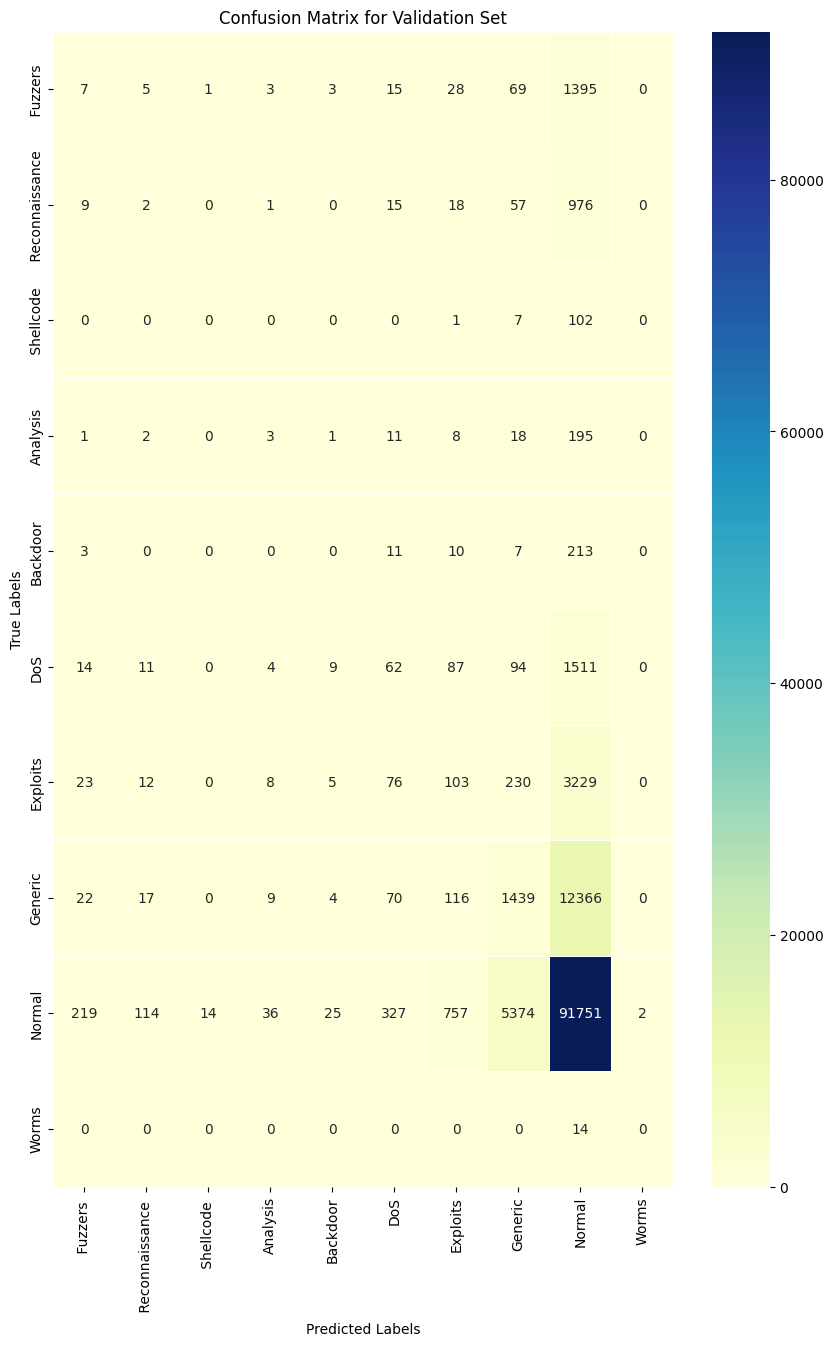

In [108]:
# prompt: gere uma matriz de confusão para y_validacao e y_pred_v

# ... (your existing code) ...

# Calculate the confusion matrix for validation set
matriz_confusao_v = confusion_matrix(y_validacao, y_pred_v)

# Plot the confusion matrix for validation set using seaborn
plt.figure(figsize=(10, 15))
sns.heatmap(matriz_confusao_v, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Validation Set")
plt.show()

In [109]:
arr = y_pred_v
# Contar as ocorrências de 9
ocorrencias_9 = np.count_nonzero(arr == 17)
ocorrencias_9, #0 #2008

(0,)

<Figure size 1200x600 with 0 Axes>

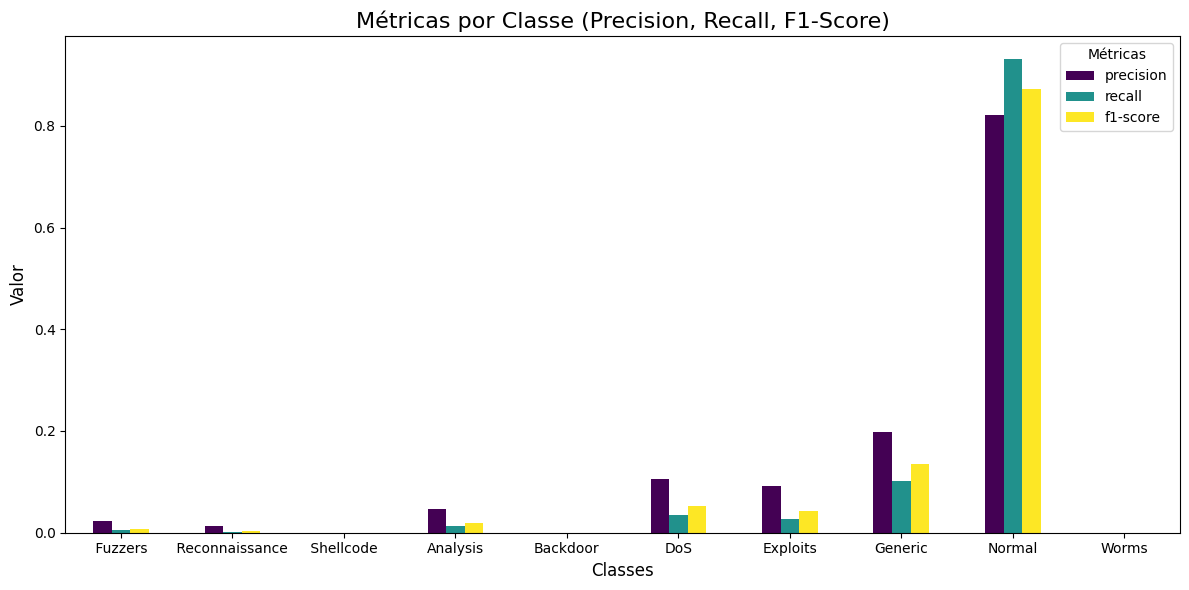

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

# Exemplo: Gerar o classification_report (substitua pelo seu y_validacao e y_pred_v)
# report_v = classification_report(y_validacao, y_pred_v, output_dict=True)

# 1. Transformar o relatório em DataFrame
df_report = pd.DataFrame(report_v).T

# 2. Separar as métricas das classes e médias gerais
classes = df_report.iloc[:-3, :3]  # Todas as classes (exclui últimas linhas como 'accuracy')

# 3. Gráfico 1: Métricas por Classe
plt.figure(figsize=(12, 6))
classes.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Métricas por Classe (Precision, Recall, F1-Score)", fontsize=16)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(rotation=0)
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=0, ha="center")
plt.legend(title="Métricas", loc='upper right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


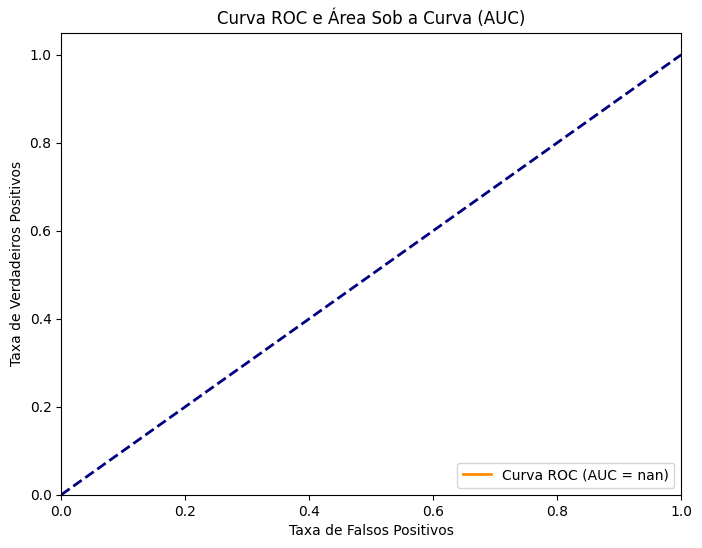

In [111]:
from sklearn.metrics import roc_curve, auc
# Converter os rótulos de y_test para binário
y_test_binary = (y_validacao == 'normal.').astype(int)

# 10. Calcular a Curva ROC e AUC
y_pred_prob = y_pred_proba_v[:, 1]  # Probabilidades de classe positiva
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC e Área Sob a Curva (AUC)')
plt.legend(loc="lower right")
plt.show()

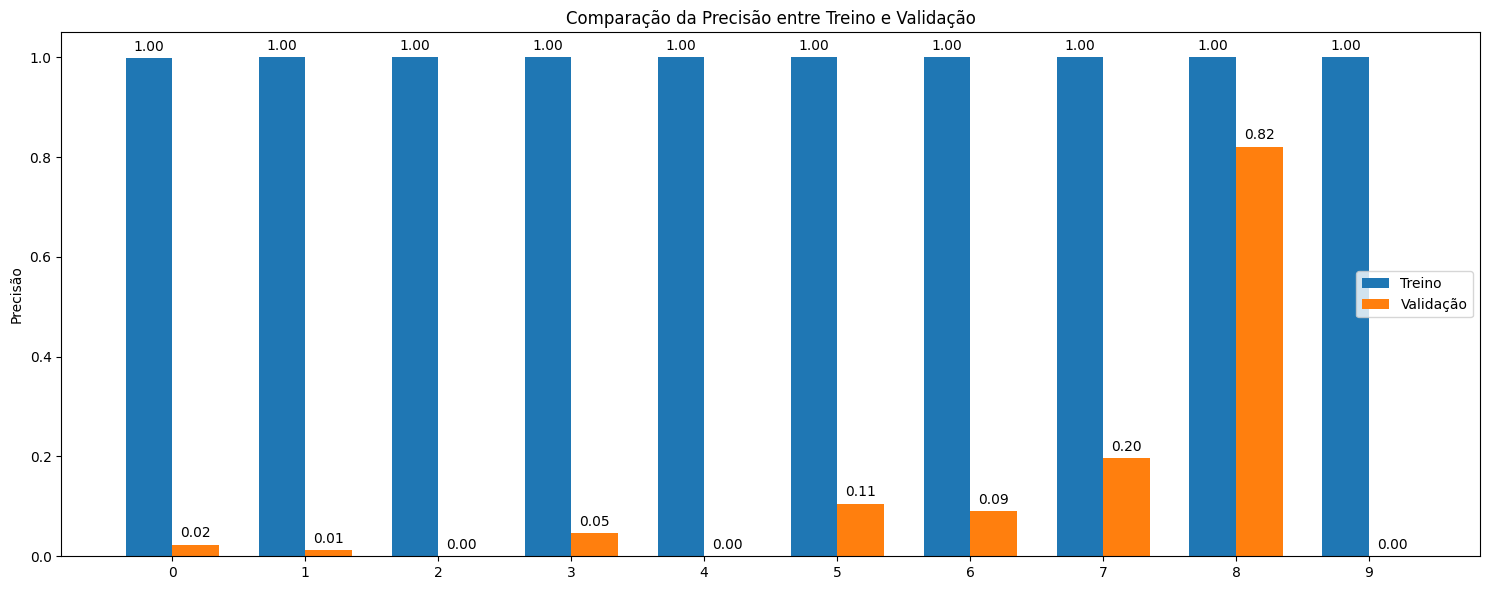

In [112]:
# prompt: compare os resultados da precision das classes meu treino de da minha validação, plot em um grafico das barras.

import matplotlib.pyplot as plt

# Dados de precisão (substitua pelos seus valores reais)
classes = list(range(len(y.unique())))  # Assumindo 23 classes
precision_treino = [report[str(i)]['precision'] for i in classes]
precision_validacao = [report_v[str(i)]['precision'] for i in classes]


# Criar gráfico de barras
x = np.arange(len(classes))  # Posições das barras no eixo x
width = 0.35  # Largura das barras

fig, ax = plt.subplots(figsize=(15, 6))
rects1 = ax.bar(x - width/2, precision_treino, width, label='Treino')
rects2 = ax.bar(x + width/2, precision_validacao, width, label='Validação')

# Adicionar rótulos e título
ax.set_ylabel('Precisão')
ax.set_title('Comparação da Precisão entre Treino e Validação')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Adicionar valores acima das barras
def autolabel(rects):
    """Adiciona rótulos acima das barras."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

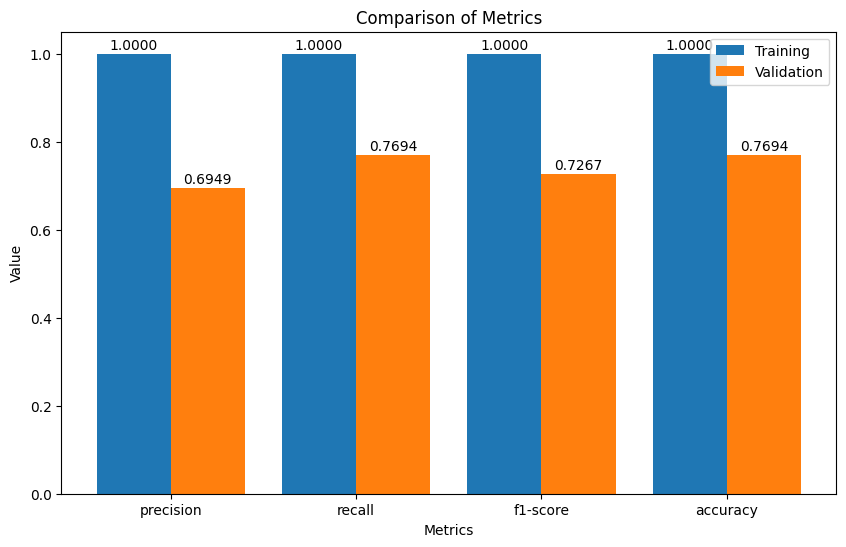

In [113]:
# prompt: gere um codigo que compare as metricas da minha validação e do meu treino fq, recall, accuracy e recision. Coloque os valores de cada um

import pandas as pd
import matplotlib.pyplot as plt
from copy import copy

# Assuming 'report' and 'report_v' are already defined from your previous code
# and contain the classification reports for training and validation sets.

def compare_metrics(report, report_v):
    """Compares metrics (precision, recall, accuracy, f1-score) between training and validation sets."""

    metrics_train = copy(report['weighted avg'])
    metrics_train['accuracy'] = report['accuracy']
    metrics_train.pop('support')

    metrics_val = copy(report_v['weighted avg'])
    metrics_val['accuracy'] = report_v['accuracy']
    metrics_val.pop('support')

    metric_names = list(metrics_train.keys())

    # Create a DataFrame for better visualization
    df_comparison = pd.DataFrame({
        'Metric': metric_names,
        'Train': list(metrics_train.values()),
        'Validation': list(metrics_val.values())
    })

    #print(df_comparison)

    # Create bar plot
    plt.figure(figsize=(10, 6))
    X_axis = np.arange(len(metric_names))

    plt.bar(X_axis - 0.2, metrics_train.values(), 0.4, label='Training')
    plt.bar(X_axis + 0.2, metrics_val.values(), 0.4, label='Validation')

    plt.xticks(X_axis, metric_names)
    plt.xlabel("Metrics")
    plt.ylabel("Value")
    plt.title("Comparison of Metrics")
    plt.legend()

    # Add values on top of bars
    for i, v in enumerate(metrics_train.values()):
      plt.text(i-0.2, v + 0.01, f"{v:.4f}", ha='center')
    for i, v in enumerate(metrics_val.values()):
      plt.text(i+0.2, v + 0.01, f"{v:.4f}", ha='center')
    plt.show()


compare_metrics(report, report_v)

In [114]:
df_comparacao

,Classe,Classe_Original,Sem tratamento,Total,Treino,Validacao
attack_cat,,,,,,
8,8,Normal,351150,246548,147929,98619
7,7,Generic,61878,35107,21064,14043
6,6,Exploits,11439,9214,5528,3686
0,5,DoS,5390,4481,2689,1792
5,0,Fuzzers,4907,3816,2290,1526
1,1,Reconnaissance,3530,2695,1617,1078
3,4,Backdoor,670,609,365,244
4,3,Analysis,666,598,359,239
2,2,Shellcode,371,274,164,110
